# Importing all the required Libraries, Reading and Slicing the temperature file  

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

In [2]:
data=xr.open_dataset('Temperature.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 361, time: 1096)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... -44.5 -44.75 -45.0
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 ... 2022-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-07-19 07:42:37 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
selecting_data=data.sel(time=slice('2020-01-01','2022-12-31'),longitude=slice(-3.5,1.5),latitude=slice(11.5,4.5))['t2m']
selecting_data

<xarray.DataArray 't2m' (time: 1096, latitude: 29, longitude: 21)>
[667464 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 ... 2022-12-31T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

# GROUPING BY MONTH USING THE .GROUPBY() METHOD

In [4]:
celcuis_temp=selecting_data.groupby('time.month').mean()-273
celcuis_temp

<xarray.DataArray 't2m' (month: 12, latitude: 29, longitude: 21)>
array([[[32.545227, 32.489136, 32.598053, ..., 33.51764 , 33.42871 ,
         33.43457 ],
        [32.810913, 32.851257, 32.962585, ..., 33.46643 , 33.525696,
         33.517212],
        [32.891632, 32.931885, 33.10022 , ..., 33.58185 , 33.641144,
         32.720276],
        ...,
        [27.847992, 27.94873 , 28.460754, ..., 27.867554, 27.887482,
         27.877197],
        [27.585632, 27.670563, 27.654999, ..., 27.95337 , 27.964142,
         27.906952],
        [27.780945, 27.801147, 27.790833, ..., 27.986908, 28.032898,
         27.982056]],

       [[34.76172 , 34.657654, 34.727448, ..., 35.384735, 35.319275,
         35.372223],
        [35.021393, 35.025085, 35.097443, ..., 35.311676, 35.44406 ,
         35.484924],
        [35.0925  , 35.096313, 35.233307, ..., 35.473053, 35.60559 ,
         34.737305],
...
        [27.733734, 27.794586, 28.107452, ..., 27.662964, 27.6734  ,
         27.641174],
        [27.165833, 27.2182  , 27.237122, ..., 27.604828, 27.611298,
         27.587341],
        [27.211426, 27.246063, 27.267548, ..., 27.54013 , 27.574097,
         27.553131]],

       [[33.81369 , 33.74405 , 33.947723, ..., 35.065887, 34.913757,
         34.93103 ],
        [33.94519 , 33.96466 , 34.16928 , ..., 34.893036, 34.980408,
         34.981415],
        [33.922577, 33.942047, 34.135223, ..., 34.92755 , 35.015045,
         34.12027 ],
        ...,
        [27.935913, 27.989075, 28.313751, ..., 28.01651 , 28.041718,
         28.01773 ],
        [27.53653 , 27.581177, 27.577148, ..., 28.008026, 28.026306,
         28.005371],
        [27.65097 , 27.669464, 27.667664, ..., 27.997955, 28.038147,
         28.02185 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Calculating the EIP using the Temperature in degree celcuis.

In [5]:
EIP=111/(celcuis_temp-16)
EIP

<xarray.DataArray 't2m' (month: 12, latitude: 29, longitude: 21)>
array([[[ 6.7088833,  6.731705 ,  6.6875315, ...,  6.33647  ,
          6.3688016,  6.366661 ],
        [ 6.602854 ,  6.5870457,  6.5438137, ...,  6.3550477,
          6.3335576,  6.3366246],
        [ 6.571301 ,  6.555679 ,  6.4911447, ...,  6.3133297,
          6.292109 ,  6.6386466],
        ...,
        [ 9.368676 ,  9.28969  ,  8.907968 , ...,  9.353233 ,
          9.337554 ,  9.345639 ],
        [ 9.5808325,  9.511109 ,  9.52381  , ...,  9.286085 ,
          9.277723 ,  9.322285 ],
        [ 9.421995 ,  9.405865 ,  9.414094 , ...,  9.260103 ,
          9.22471  ,  9.263853 ]],

       [[ 5.916302 ,  5.9493012,  5.9271293, ...,  5.7261553,
          5.7455573,  5.7298536],
        [ 5.835535 ,  5.834402 ,  5.8122964, ...,  5.747818 ,
          5.708684 ,  5.696712 ],
        [ 5.813802 ,  5.81264  ,  5.7712383, ...,  5.700185 ,
          5.66165  ,  5.924011 ],
...
        [ 9.459904 ,  9.411098 ,  9.167907 , ...,  9.517306 ,
          9.508797 ,  9.535121 ],
        [ 9.941041 ,  9.894635 ,  9.8779745, ...,  9.564984 ,
          9.559655 ,  9.579419 ],
        [ 9.900614 ,  9.870121 ,  9.851301 , ...,  9.618608 ,
          9.590382 ,  9.607785 ]],

       [[ 6.2311625,  6.2556186,  6.1846285, ...,  5.821916 ,
          5.868744 ,  5.8633895],
        [ 6.1855016,  6.1787977,  6.1092124, ...,  5.8751807,
          5.8481355,  5.8478255],
        [ 6.193306 ,  6.186585 ,  6.1206856, ...,  5.864467 ,
          5.837483 ,  6.1257367],
        ...,
        [ 9.299665 ,  9.25843  ,  9.014313 , ...,  9.237291 ,
          9.217954 ,  9.236353 ],
        [ 9.621611 ,  9.584518 ,  9.587853 , ...,  9.243817 ,
          9.229767 ,  9.245862 ],
        [ 9.527103 ,  9.512005 ,  9.513473 , ...,  9.251576 ,
          9.220688 ,  9.233188 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Interpretation of the Graph data
According to the CDC, Temperature is particularly critical for the transmission of Malaria. For example, at temperatures below 20°C (68°F), Plasmodium falciparum (which causes severe malaria) cannot complete its growth cycle in the Anopheles mosquito, and thus cannot be transmitted.

In many malaria-endemic countries, malaria transmission does not occur in all parts of the country. Even within tropical and subtropical areas, transmission will not occur

At very high altitudes;
During colder seasons in some areas;
    
    In deserts (excluding the oases)
    In some countries where transmission has been interrupted through successful control/elimination programs.
    
Generally, in warmer regions closer to the equator

    Transmission will be more intense, and Malaria is transmitted year-round.
    The highest transmission is found in Africa South of the Sahara and in parts of Oceania such as Papua New Guinea.

In cooler regions, transmission will be less intense and more seasonal. There, P. vivax might be more prevalent because it is more tolerant of lower ambient temperatures.

In many temperate areas, such as western Europe and the United States, economic development and public health measures have succeeded in eliminating malaria. However, most of these areas have Anopheles mosquitoes that can transmit malaria, and reintroduction of the disease is a constant risk

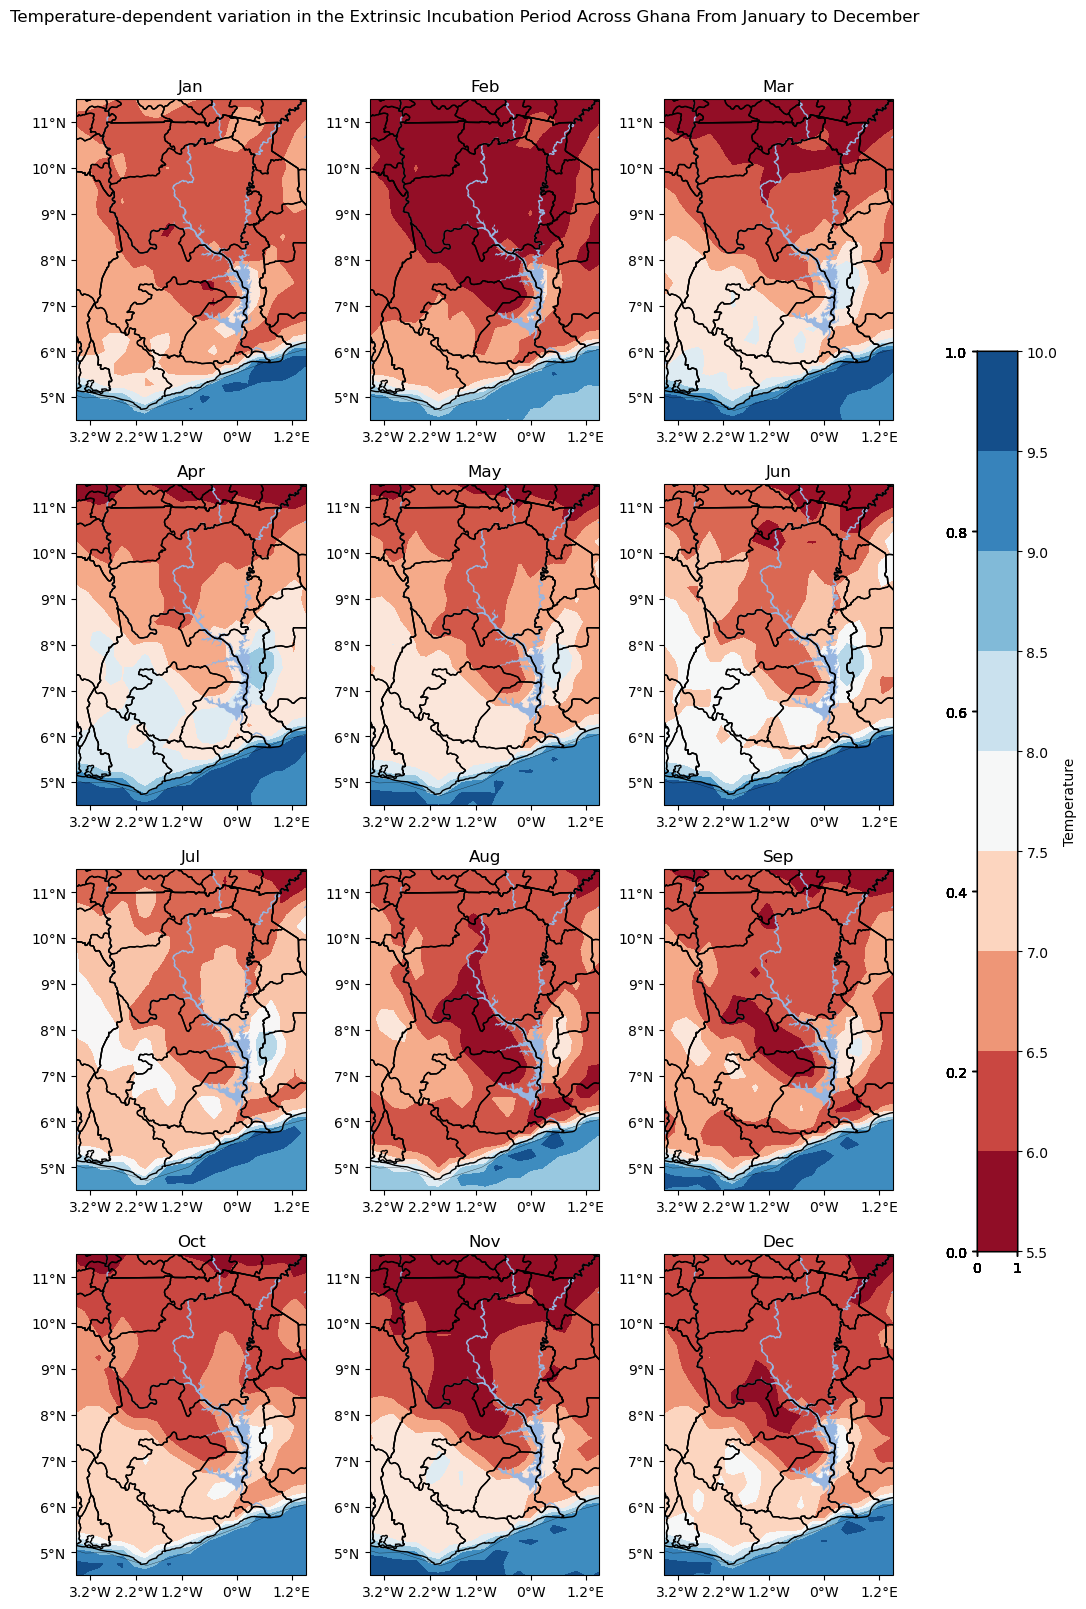

In [6]:
fig,ax=plt.subplots(4,3,figsize=(16,18),subplot_kw={'projection':ccrs.PlateCarree()})

ax=ax.flatten()

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(0,12):
    ax[i].set_title(months[i])
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].add_feature(cfeature.LAKES)
    ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.LAND)
    ax[i].set_extent([-3.5,1.5,4.5,11.5])
    ax[i].set_xticks([-3.2,-2.2,-1.2,0,1.2], crs=ccrs.PlateCarree())
    ax[i].set_yticks([11,10,9,8,7,6,5], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    cb=ax[i].contourf(EIP.longitude,EIP.latitude,EIP[i], cmap='RdBu',transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])

plt.suptitle('Temperature-dependent variation in the Extrinsic Incubation Period Across Ghana From January to December')
fig.colorbar(cb,cax=color_bar,label='Temperature')
fig.subplots_adjust(wspace=-0.55, top=0.93);


# GROUPING BY SEASON 

In [7]:
#Grouping the data by season
season=selecting_data.groupby('time.season').mean()-273
season

<xarray.DataArray 't2m' (season: 4, latitude: 29, longitude: 21)>
array([[[33.675873, 33.60013 , 33.729004, ..., 34.634644, 34.531128,
         34.555878],
        [33.893494, 33.91516 , 34.046295, ..., 34.53476 , 34.626556,
         34.636993],
        [33.93567 , 33.95755 , 34.12445 , ..., 34.63687 , 34.728912,
         33.833588],
        ...,
        [27.946228, 28.022858, 28.468475, ..., 28.081757, 28.111511,
         28.09674 ],
        [27.628967, 27.693512, 27.681915, ..., 28.121124, 28.142334,
         28.0997  ],
        [27.811096, 27.834564, 27.826874, ..., 28.13556 , 28.183594,
         28.147003]],

       [[29.434631, 29.54303 , 29.630554, ..., 30.454956, 30.378906,
         30.506714],
        [29.434387, 29.371765, 29.458862, ..., 30.161194, 30.364838,
         30.481537],
        [29.266907, 29.204193, 29.27658 , ..., 30.160217, 30.364014,
         29.855438],
...
        [28.079102, 28.121094, 28.444244, ..., 28.206299, 28.25122 ,
         28.258484],
        [27.716827, 27.751526, 27.75592 , ..., 28.186035, 28.226227,
         28.230133],
        [27.8703  , 27.890228, 27.897827, ..., 28.154694, 28.22055 ,
         28.227997]],

       [[32.344574, 32.514465, 32.66858 , ..., 32.91455 , 32.79123 ,
         32.975067],
        [32.349   , 32.40204 , 32.557343, ..., 32.603638, 32.813934,
         32.98633 ],
        [32.159393, 32.212433, 32.35788 , ..., 32.560852, 32.771454,
         32.446503],
        ...,
        [26.606781, 26.682068, 27.01532 , ..., 26.58603 , 26.618103,
         26.61789 ],
        [26.150757, 26.21695 , 26.227264, ..., 26.554169, 26.58142 ,
         26.570984],
        [26.2482  , 26.275665, 26.289398, ..., 26.516571, 26.559967,
         26.552368]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [8]:
EIP_season=111/(season-16)
EIP_season

<xarray.DataArray 't2m' (season: 4, latitude: 29, longitude: 21)>
array([[[ 6.2797465,  6.306772 ,  6.260927 , ...,  5.9566474,
          5.9899216,  5.981932 ],
        [ 6.203372 ,  6.1958694,  6.150847 , ...,  5.9887476,
          5.9592338,  5.9558964],
        [ 6.188785 ,  6.181244 ,  6.1243234, ...,  5.9559355,
          5.926666 ,  6.2242103],
        ...,
        [ 9.2916355,  9.232414 ,  8.9024515, ...,  9.187406 ,
          9.164835 ,  9.176025 ],
        [ 9.54513  ,  9.492443 ,  9.501866 , ...,  9.157566 ,
          9.14157  ,  9.17378  ],
        [ 9.397943 ,  9.379306 ,  9.385405 , ...,  9.146674 ,
          9.110612 ,  9.138057 ]],

       [[ 8.262229 ,  8.196098 ,  8.143469 , ...,  7.679027 ,
          7.719641 ,  7.6516294],
        [ 8.262379 ,  8.301073 ,  8.247354 , ...,  7.838322 ,
          7.727202 ,  7.6649323],
        [ 8.366683 ,  8.406421 ,  8.360586 , ...,  7.838863 ,
          7.727645 ,  8.011294 ],
...
        [ 9.189425 ,  9.157589 ,  8.919786 , ...,  9.093666 ,
          9.060322 ,  9.054954 ],
        [ 9.473555 ,  9.445581 ,  9.442051 , ...,  9.108788 ,
          9.078843 ,  9.075944 ],
        [ 9.351069 ,  9.335397 ,  9.329434 , ...,  9.132275 ,
          9.08306  ,  9.077529 ]],

       [[ 6.7912445,  6.72138  ,  6.659236 , ...,  6.562397 ,
          6.6105943,  6.539002 ],
        [ 6.7894063,  6.7674513,  6.7039742, ...,  6.6852818,
          6.6016674,  6.534667 ],
        [ 6.8690696,  6.846597 ,  6.7857203, ...,  6.7025537,
          6.6183887,  6.749155 ],
        ...,
        [10.465003 , 10.391247 , 10.076875 , ..., 10.485518 ,
         10.453845 , 10.454055 ],
        [10.935145 , 10.8643   , 10.853342 , ..., 10.517171 ,
         10.490085 , 10.500442 ],
        [10.831171 , 10.80222  , 10.787803 , ..., 10.554771 ,
         10.511396 , 10.518966 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

# EIP Seasonal Explanation 
The implications of seasonal temperature patterns on malaria transmission in Ghana are significant, as they directly influence the development and transmission of the Plasmodium parasite by the mosquito vector. Understanding the Extrinsic Incubation Period (EIP) in the context of the four seasons (winter, autumn, summer, and spring) is crucial for developing effective public health strategies to combat malaria in the country. Let's explore the implications and the importance of understanding EIP for each season:

Winter:
Implications on Malaria Transmission:
    Winter is characterized by lower temperatures, which are generally unfavorable for mosquito breeding and the development of the Plasmodium parasite.
    The mosquito population tends to decrease during the winter season due to reduced breeding activity.
    The cold temperatures also slow down the development of the parasite within mosquitoes, leading to an extended EIP.
    
    
Importance of Understanding EIP:
    While malaria transmission may decrease during winter, it is essential to continue surveillance and preparedness efforts to detect any potential cases and outbreaks.
    Understanding the prolonged EIP during winter can help public health authorities in Ghana anticipate and plan for potential resurgence during the subsequent warm seasons.
    
Autumn:
    Implications on Malaria Transmission:    
    Autumn is a transitional season, and malaria transmission may continue due to lingering warm temperatures and potential mosquito breeding sites.
    The decrease in mosquito breeding sites during this season may lead to a reduction in the mosquito population, but transmission can still occur.
    Importance of Understanding EIP:

Monitoring malaria transmission during autumn is critical to assess whether control measures implemented during the preceding warm season have been effective.
Understanding the EIP during this period can guide the timing of vector control interventions to prevent any resurgence before the onset of winter.

Summer:
    Implications on Malaria Transmission:
    Summer is characterized by hot and humid conditions, which create ideal breeding environments for mosquitoes.
    The high temperatures shorten the EIP, leading to a higher rate of parasite development within mosquitoes.
    Increased mosquito activity during the summer can result in higher malaria transmission rates.
    Importance of Understanding EIP:

During summer, targeted vector control efforts, such as insecticide-treated bed nets and indoor residual spraying, become crucial to reduce mosquito populations and transmission.
Understanding the shortened EIP emphasizes the urgency of early diagnosis and prompt treatment of malaria cases to prevent severe illness and complications.

Spring:
    Implications on Malaria Transmission:
    Spring marks the transition from cooler to warmer temperatures, and mosquito breeding activities may increase.
    The relatively mild temperatures can accelerate the development of the Plasmodium parasite within mosquitoes.
    
<b>Importance of Understanding EIP:
<li>Early detection of malaria cases during spring is essential to prevent localized outbreaks and contain transmission.
<li>Understanding the EIP in the context of spring informs public health interventions to mitigate the impact of rising mosquito populations.

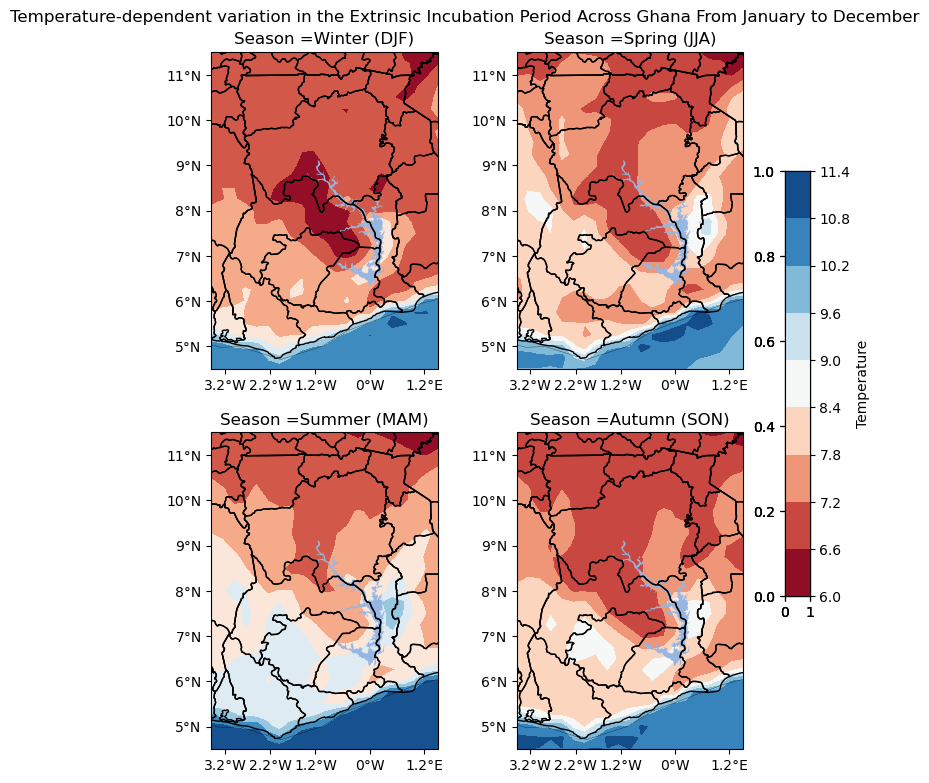

In [9]:
# Grouping The EIP Into Seasons

fig,ax=plt.subplots(2,2,figsize=(10,8.5),subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()

months=['Winter (DJF)', 'Spring (JJA)', 'Summer (MAM)', 'Autumn (SON)']

for i in range(0,4):
    
    ax[i].set_title('Season ='+ months[i])
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,alpha=0.8)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES)
    ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.LAND)
    ax[i].set_extent([-3.5,1.5,4.5,11.5])
    ax[i].set_xticks([-3.2,-2.2,-1.2,0,1.2], crs=ccrs.PlateCarree())
    ax[i].set_yticks([11,10,9,8,7,6,5], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    cb=ax[i].contourf(EIP_season.longitude,EIP_season.latitude,EIP_season[i],cmap='RdBu',transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
    
plt.suptitle('Temperature-dependent variation in the Extrinsic Incubation Period Across Ghana From January to December')
fig.colorbar(cb,cax=color_bar,label='Temperature')
fig.subplots_adjust(wspace=-0.35, top=0.93)
plt.show()